
1.   data manipulation - pandas

2.   mathematical calc - numpy

3.    data visualization -matplotlib , seaborn




In [60]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import gc
import os
import sys
%matplotlib inline


In [61]:
cab_data = pd.read_csv('/content/cab_rides.csv')
cab_data.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [62]:
weather_data = pd.read_csv('/content/seattle-weather.csv')

In [63]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [64]:
cab_data = reduce_mem_usage(cab_data)

Memory usage of dataframe is 52.88 MB
Memory usage after optimization is: 36.62 MB
Decreased by 30.8%


In [65]:
weather_data = reduce_mem_usage(weather_data)

Memory usage of dataframe is 0.07 MB
Memory usage after optimization is: 0.06 MB
Decreased by 12.9%


In [ ]:
cab_data.head()

In [78]:
weather_data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.000000,12.796875,5.000000,4.699219,drizzle
1,2012-01-02,10.898438,10.601562,2.800781,4.500000,rain
2,2012-01-03,0.799805,11.703125,7.199219,2.300781,rain
3,2012-01-04,20.296875,12.203125,5.601562,4.699219,rain
4,2012-01-05,1.299805,8.898438,2.800781,6.101562,rain


In [66]:
cab_data.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name'],
      dtype='object')

In [67]:
weather_data.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

In [80]:
import datetime
cab_data['datetime'] = pd.to_datetime(cab_data['time_stamp'])
cab_data
weather_data['date_time'] = (weather_data['date'])

In [81]:
cab_data.shape

(693071, 11)

In [82]:
weather_data.shape

(1461, 7)

In [83]:
cab_data.describe()

,distance,time_stamp,price,surge_multiplier
count,693071.000000,6.930710e+05,637976.0,693071.0
mean,NaN,1.544046e+12,NaN,NaN
std,0.000000,6.891925e+08,0.0,0.0
min,0.020004,1.543204e+12,2.5,1.0
25%,1.280273,1.543444e+12,9.0,1.0
50%,2.160156,1.543737e+12,13.5,1.0
75%,2.919922,1.544828e+12,22.5,1.0
max,7.859375,1.545161e+12,97.5,3.0


In [84]:
weather_data.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.031250,16.437500,8.234375,3.242188
std,6.679688,7.351562,5.023438,1.437500
min,0.000000,-1.599609,-7.101562,0.399902
25%,0.000000,10.601562,4.398438,2.199219
50%,0.000000,15.601562,8.296875,3.000000
75%,2.800781,22.203125,12.203125,4.000000
max,55.906250,35.593750,18.296875,9.500000


In [85]:
a = pd.concat([cab_data,weather_data])

In [94]:
a.tail()
a.head()


,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime,date,precipitation,temp_max,temp_min,wind,weather,date_time
0,0.439941,Lyft,1.544953e+12,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,1970-01-01 00:25:44.952607890,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.439941,Lyft,1.543284e+12,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,1970-01-01 00:25:43.284023677,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.439941,Lyft,1.543367e+12,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,1970-01-01 00:25:43.366822198,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.439941,Lyft,1.543554e+12,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,1970-01-01 00:25:43.553582749,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.439941,Lyft,1.543463e+12,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,1970-01-01 00:25:43.463360223,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
a['day'] =  a.datetime.dt.day
a['hour'] = a.datetime.dt.hour


In [99]:
a.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime,date,precipitation,temp_max,temp_min,wind,weather,date_time,day,hour
0,0.439941,Lyft,1.544953e+12,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,1970-01-01 00:25:44.952607890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
1,0.439941,Lyft,1.543284e+12,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,1970-01-01 00:25:43.284023677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
2,0.439941,Lyft,1.543367e+12,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,1970-01-01 00:25:43.366822198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
3,0.439941,Lyft,1.543554e+12,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,1970-01-01 00:25:43.553582749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
4,0.439941,Lyft,1.543463e+12,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,1970-01-01 00:25:43.463360223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0


In [100]:
a.tail()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime,date,precipitation,temp_max,temp_min,wind,weather,date_time,day,hour
1456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,2015-12-27,8.601562,4.398438,1.700195,2.900391,rain,2015-12-27,NaN,NaN
1457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,2015-12-28,1.500000,5.000000,1.700195,1.299805,rain,2015-12-28,NaN,NaN
1458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,2015-12-29,0.000000,7.199219,0.600098,2.599609,fog,2015-12-29,NaN,NaN
1459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,2015-12-30,0.000000,5.601562,-1.000000,3.400391,sun,2015-12-30,NaN,NaN
1460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,2015-12-31,0.000000,5.601562,-2.099609,3.500000,sun,2015-12-31,NaN,NaN


In [101]:
a.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'datetime', 'date',
       'precipitation', 'temp_max', 'temp_min', 'wind', 'weather', 'date_time',
       'day', 'hour'],
      dtype='object')

In [ ]:
a.fillna({'time_stamp':0})

In [ ]:
a.fillna({'temp_max':0, 'temp_min':0, 'wind':0, 'date_time':0, 'day':0, 'hour':0, 'precipitation':0,
          'surge_multiplier':0, 'price':0, 'distance':0, 'time_stamp' })

In [105]:
a.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'datetime', 'date',
       'precipitation', 'temp_max', 'temp_min', 'wind', 'weather', 'date_time',
       'day', 'hour'],
      dtype='object')

In [106]:
a.groupby('cab_type').count()

,distance,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime,date,precipitation,temp_max,temp_min,wind,weather,date_time,day,hour
cab_type,,,,,,,,,,,,,,,,,,,
Lyft,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,0,0,0,0,0,0,0,307408,307408
Uber,385663,385663,385663,385663,330568,385663,385663,385663,385663,385663,0,0,0,0,0,0,0,385663,385663


<Axes: xlabel='cab_type'>

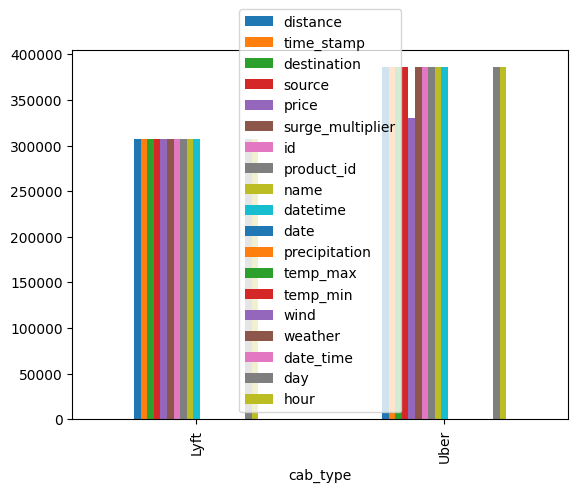

In [107]:
a.groupby('cab_type').count().plot.bar()

<Axes: >

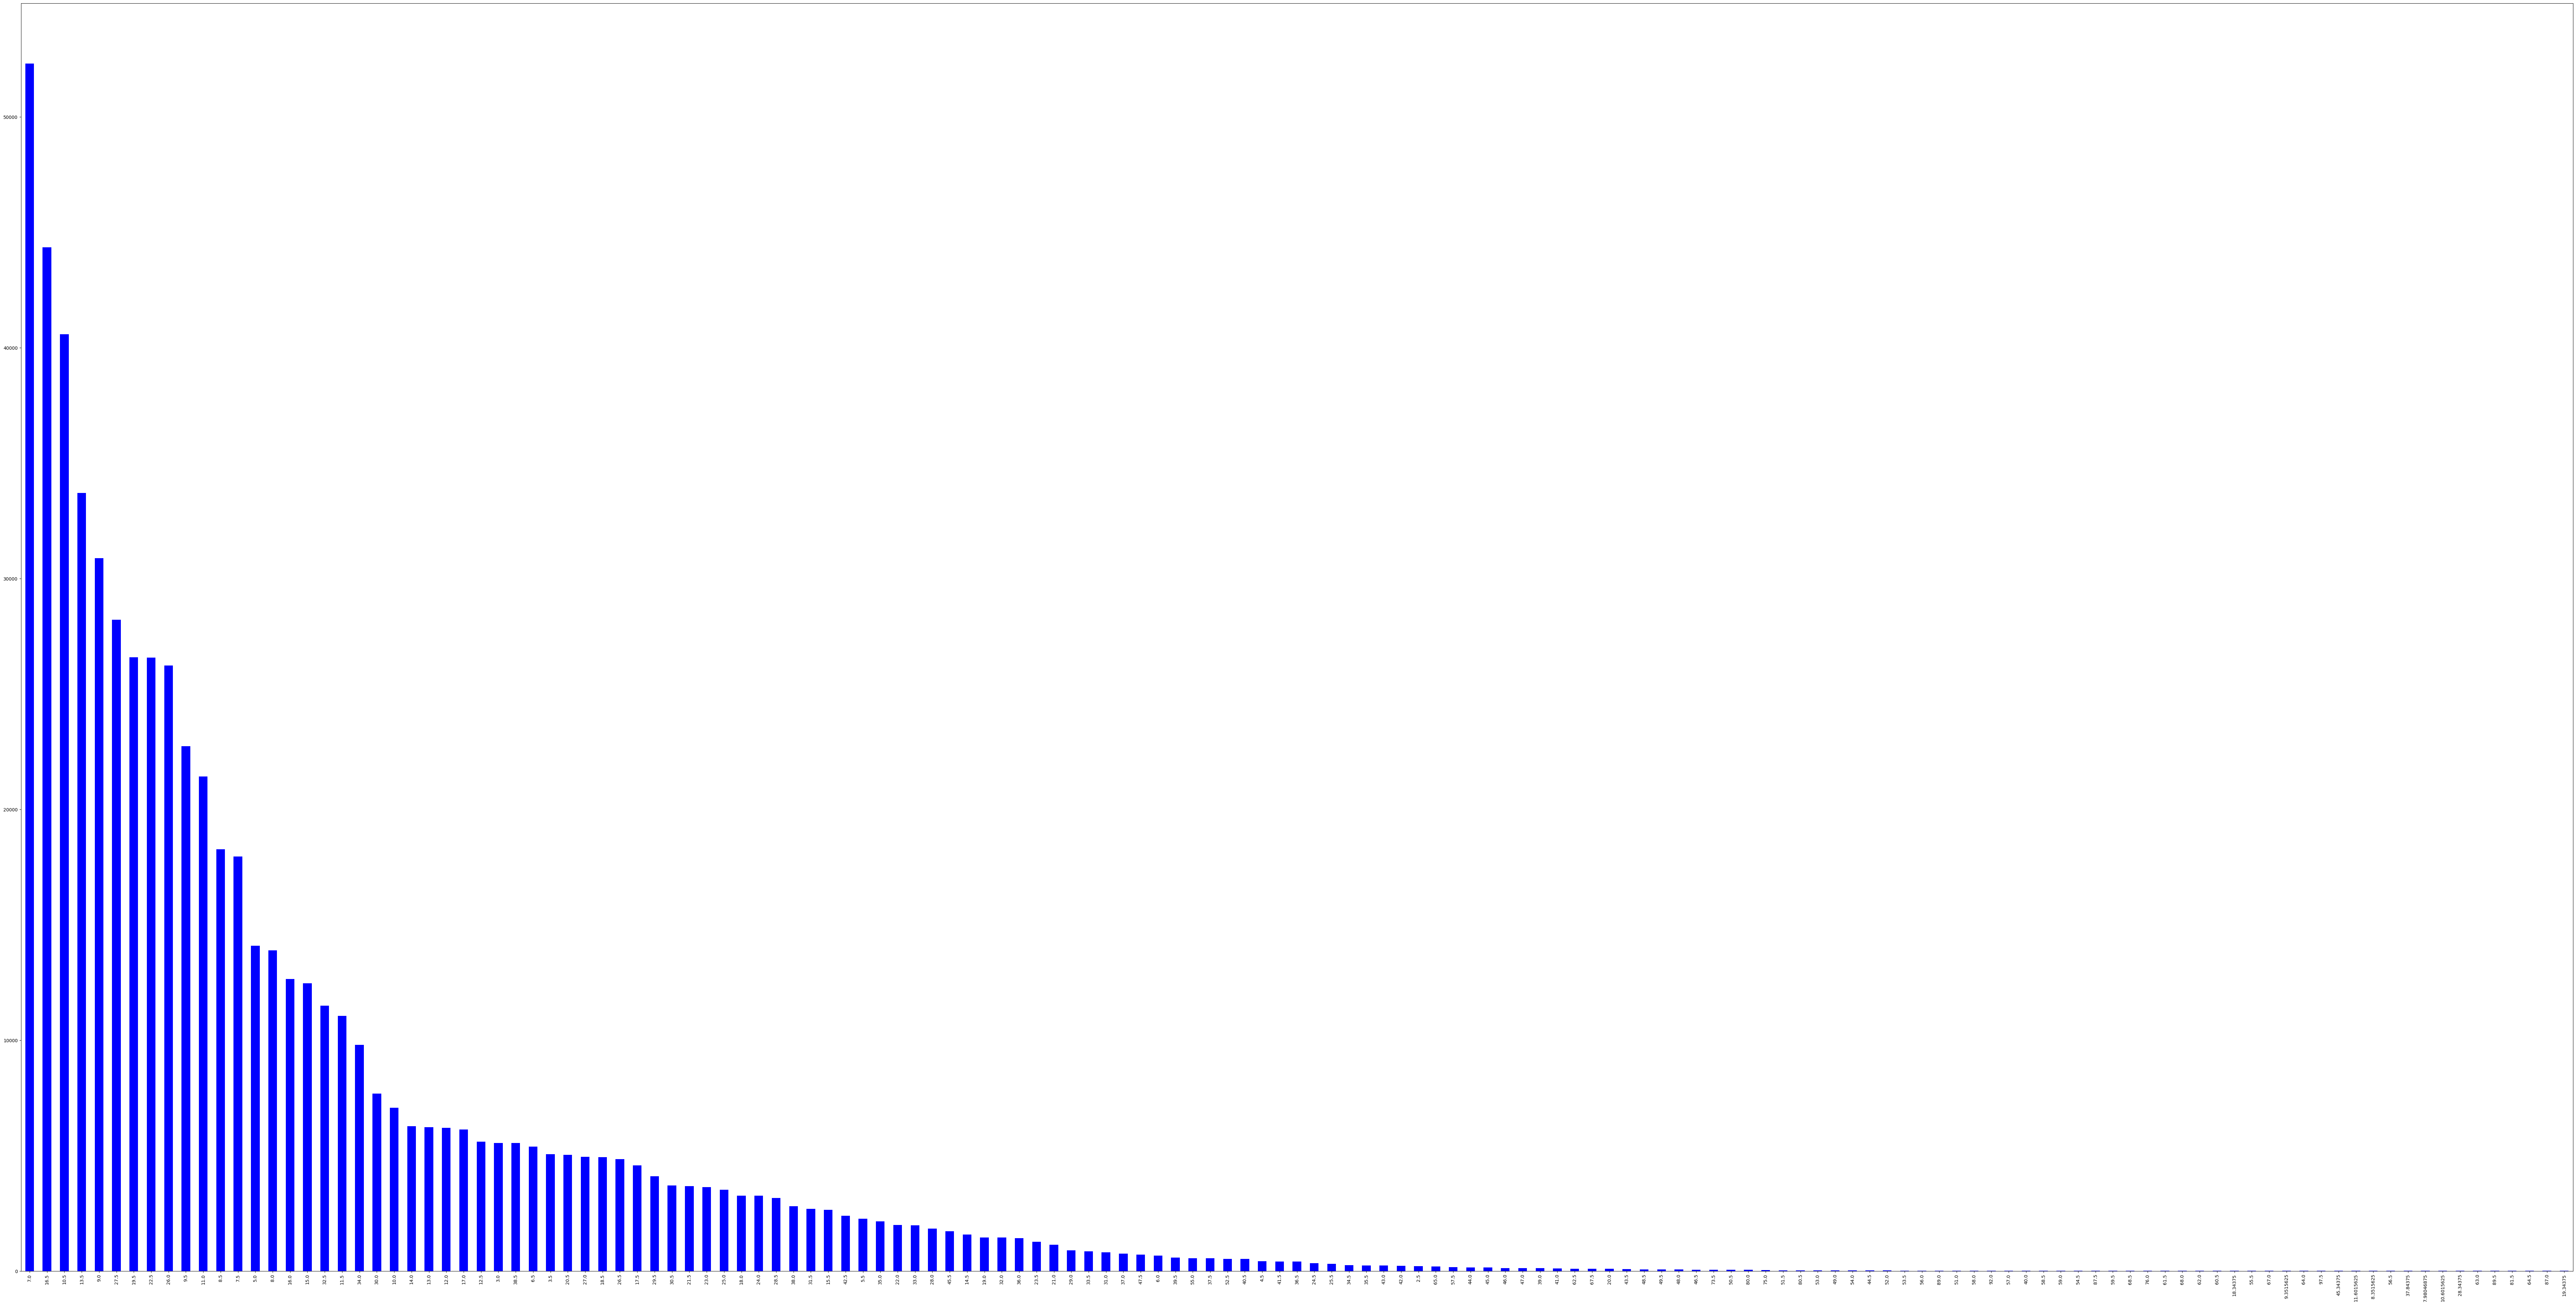

In [108]:
a['price'].value_counts().plot(kind = 'bar', figsize=(100,50), color='blue')

<Axes: >

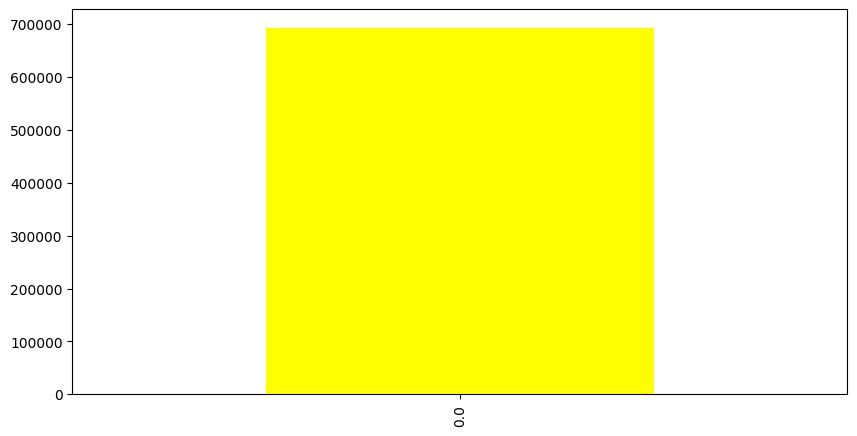

In [109]:
a['hour'].value_counts().plot(kind = "bar", figsize = (10,5), color="yellow")


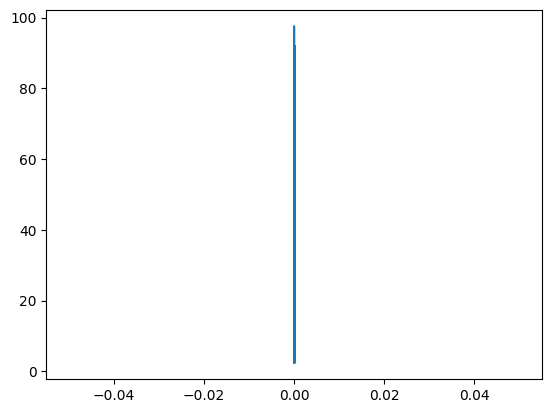

In [110]:
import matplotlib.pyplot as plt
x = a['hour']
y = a['price']
plt.plot(x,y)
plt.show()

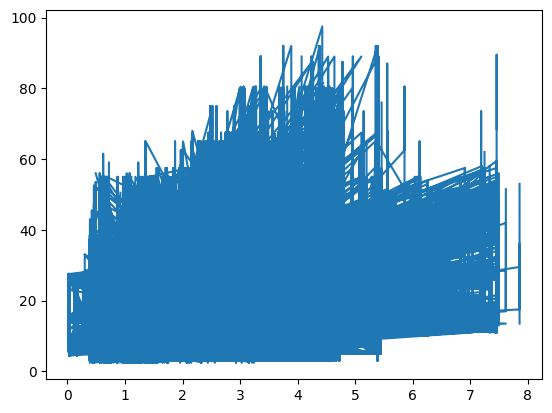

In [111]:
x = a['distance']
y = a['price']
plt.plot(x,y)
plt.show()

In [112]:
x1 = a[['distance', 'surge_multiplier',  'precipitation', 'temp_max', 'temp_min', 'wind',
       'day', 'hour']]

y1 = a[[ 'price']]

In [113]:
#training and testing data
from sklearn.model_selection import train_test_split

#random_state = 42 as it takes data randomly
x_train, y_train, x_test, y_test = train_test_split(x1, y1, test_size=0.25, random_state=42)


In [114]:
numValues = a.select_dtypes(np.number)
numValues.fillna(0, inplace=True)
numValues.head()

,distance,time_stamp,price,surge_multiplier,precipitation,temp_max,temp_min,wind,day,hour
0,0.439941,1.544953e+12,5.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.439941,1.543284e+12,11.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.439941,1.543367e+12,7.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.439941,1.543554e+12,26.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.439941,1.543463e+12,9.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [154]:
x1 = numValues[['distance', 'precipitation', 'temp_max', 'temp_min', 'wind', 'day', 'hour']]
y1 = numValues['price']

In [155]:
#training and testing data
from sklearn.model_selection import train_test_split

#random_state = 42 as it takes data randomly
x_train, y_train, x_test, y_test = train_test_split(x1, y1, test_size=0.25, random_state=42)

In [ ]:
linear = LinearRegression()
linear.fit(x_train, x_test)

In [157]:
predictions = linear.predict(y_train)
predictions

array([15.49299282, 17.61525705, 12.80479147, ..., 16.89267661,
       14.51270887, 12.90837818])

In [158]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
df

,Actual,Predicted
550338,8.0,15.492993
360320,7.0,17.615257
393628,27.5,12.804791
344173,13.5,13.297460
36033,30.5,16.245891
...,...,...
361033,8.5,15.988188
387812,12.0,12.701205
379259,27.5,16.892677
667040,9.0,14.512709


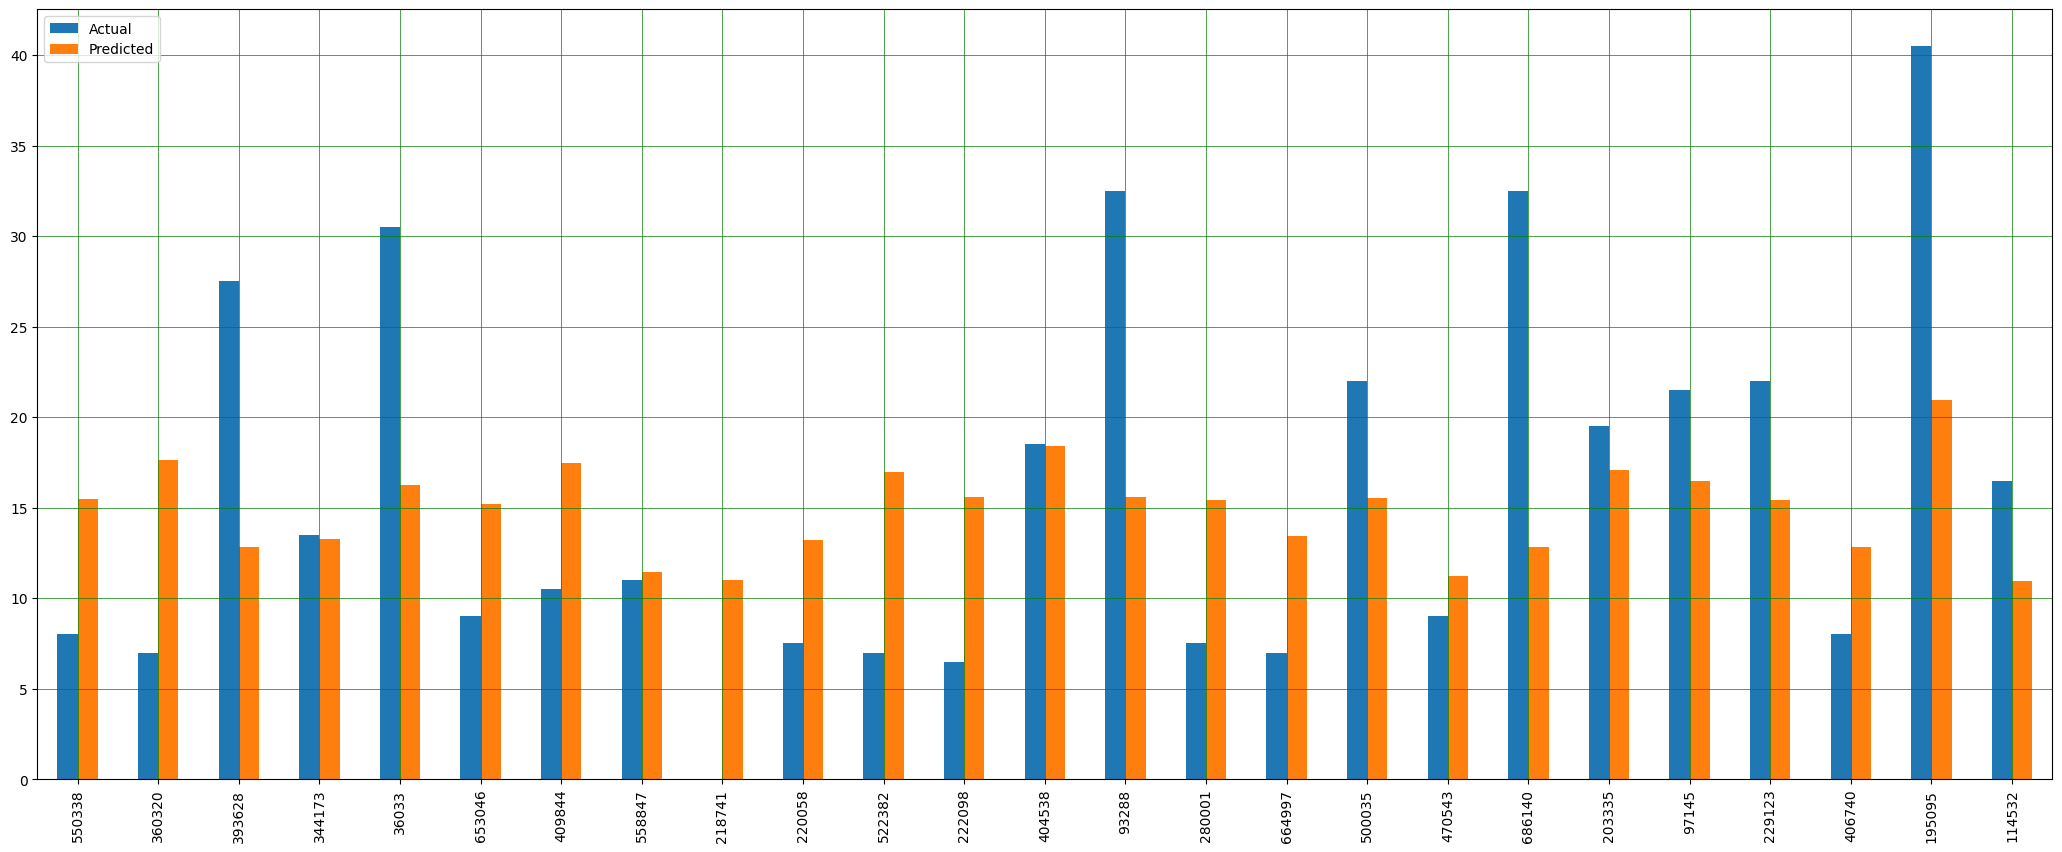

In [160]:
df1 =df.head(25)
df1.plot(kind = 'bar', figsize= (26,10))
plt.grid(which = 'major', linestyle = '-', linewidth='0.5', color='green')
plt.grid(which = 'minor', linestyle = ':', linewidth='0.5', color='black')
plt.show()